# Разведочный анализ данных: продолжение

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

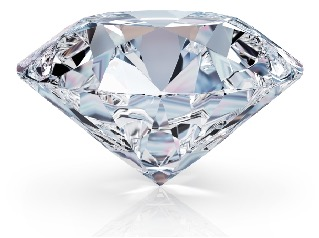

## Импорт библиотек и загрузка данных

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
DIAMONDS_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_clean.csv"

In [106]:
df = pd.read_csv(DIAMONDS_DATASET)
df_cat = df.copy()

In [107]:
#OneHotEncodим Цвет
# Создаём переменные
color_dummies = pd.get_dummies(df['color'], prefix='color').astype(int)
# Добавляем к DataFrame
df = pd.concat([df, color_dummies], axis=1)
df = df.drop('color', axis=1)

# Кодируем  Cut
cut_order = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
df['cut'] = df['cut'].map(cut_order)

#Кодируем clarity
clarity_map = {'I1': 7, 'SI2': 6, 'SI1': 5, 'VS2': 4, 'VS1': 3, 'VVS2': 2, 'VVS1': 2, 'IF': 1}
df['clarity'] = df['clarity'].map(clarity_map)

In [108]:
df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J'],
      dtype='object')

In [109]:
original_rows = len(df)
print(f"Исходное количество строк в таблице: {original_rows}")

# Находим строки с хотя бы одной нулевой координатой
zero_mask = (df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)
zero_rows_count = zero_mask.sum()
print(f"Количество строк с нулевыми координатами: {zero_rows_count}")

df = df.drop(df[zero_mask].index)

# Подсчитываем оставшиеся строки
remaining_rows = len(df)
print(f"Количество строк после удаления: {remaining_rows}")

Исходное количество строк в таблице: 53805
Количество строк с нулевыми координатами: 19
Количество строк после удаления: 53786


In [110]:
df_cat = df_cat.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})

# Находим строки с хотя бы одной нулевой координатой
zero_mask = (df_cat['x'] == 0) | (df_cat['y'] == 0) | (df_cat['z'] == 0)
zero_rows_count = zero_mask.sum()

df_cat = df_cat.drop(df_cat[zero_mask].index)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [111]:
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,4,6,61.5,55.0,326.0,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,5,59.8,61.0,326.0,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,3,56.9,65.0,327.0,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,4,62.4,58.0,334.0,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,6,63.3,58.0,335.0,4.34,4.35,2.75,0,0,0,0,0,0,1


## Исследование данных

Размер датасета

In [112]:
df.shape

(53786, 16)

Информация о типах данных и пропусках

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53786 entries, 0 to 53804
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53786 non-null  float64
 1   cut      53786 non-null  int64  
 2   clarity  53786 non-null  int64  
 3   depth    53786 non-null  float64
 4   table    53786 non-null  float64
 5   price    53786 non-null  float64
 6   x        53786 non-null  float64
 7   y        53786 non-null  float64
 8   z        53786 non-null  float64
 9   color_D  53786 non-null  int64  
 10  color_E  53786 non-null  int64  
 11  color_F  53786 non-null  int64  
 12  color_G  53786 non-null  int64  
 13  color_H  53786 non-null  int64  
 14  color_I  53786 non-null  int64  
 15  color_J  53786 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 7.0 MB


In [114]:
df['cut'].unique()

array([4, 3, 1, 2, 0])

In [115]:
df[df.duplicated()]

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
12686,0.26,4,2,61.6,57.0,599.0,4.08,4.10,2.52,0,0,1,0,0,0,0
31594,0.26,4,2,61.6,57.0,769.0,4.10,4.08,2.52,0,0,1,0,0,0,0


In [116]:
df.describe(include='all')

,carat,cut,clarity,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J
count,53786.000000,53786.000000,53786.000000,53786.000000,53786.000000,53786.000000,53786.000000,53786.000000,53786.000000,53786.00000,53786.000000,53786.000000,53786.000000,53786.000000,53786.000000,53786.000000
mean,0.796342,2.901406,4.048749,61.749433,57.457786,3931.718588,5.731689,5.734953,3.540050,0.12559,0.181776,0.176961,0.209274,0.153757,0.100547,0.052095
std,0.470776,1.117842,1.463168,1.415463,2.233190,3986.732404,1.118828,1.139589,0.702185,0.33139,0.385663,0.381639,0.406794,0.360719,0.300730,0.222221
min,0.200000,0.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,3.000000,61.100000,56.000000,951.000000,4.710000,4.720000,2.910000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,4.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.010000,4.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
print(df.isnull().sum())

carat      0
cut        0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
color_D    0
color_E    0
color_F    0
color_G    0
color_H    0
color_I    0
color_J    0
dtype: int64


In [118]:
count_x = int((df['x'] == 0).sum())
count_y = int((df['y'] == 0).sum())
count_z = int((df['z'] == 0).sum())
print([count_x, count_y, count_z])

[0, 0, 0]


## Взаимозависимость в данных

### 1. Корреляция

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

<Axes: >

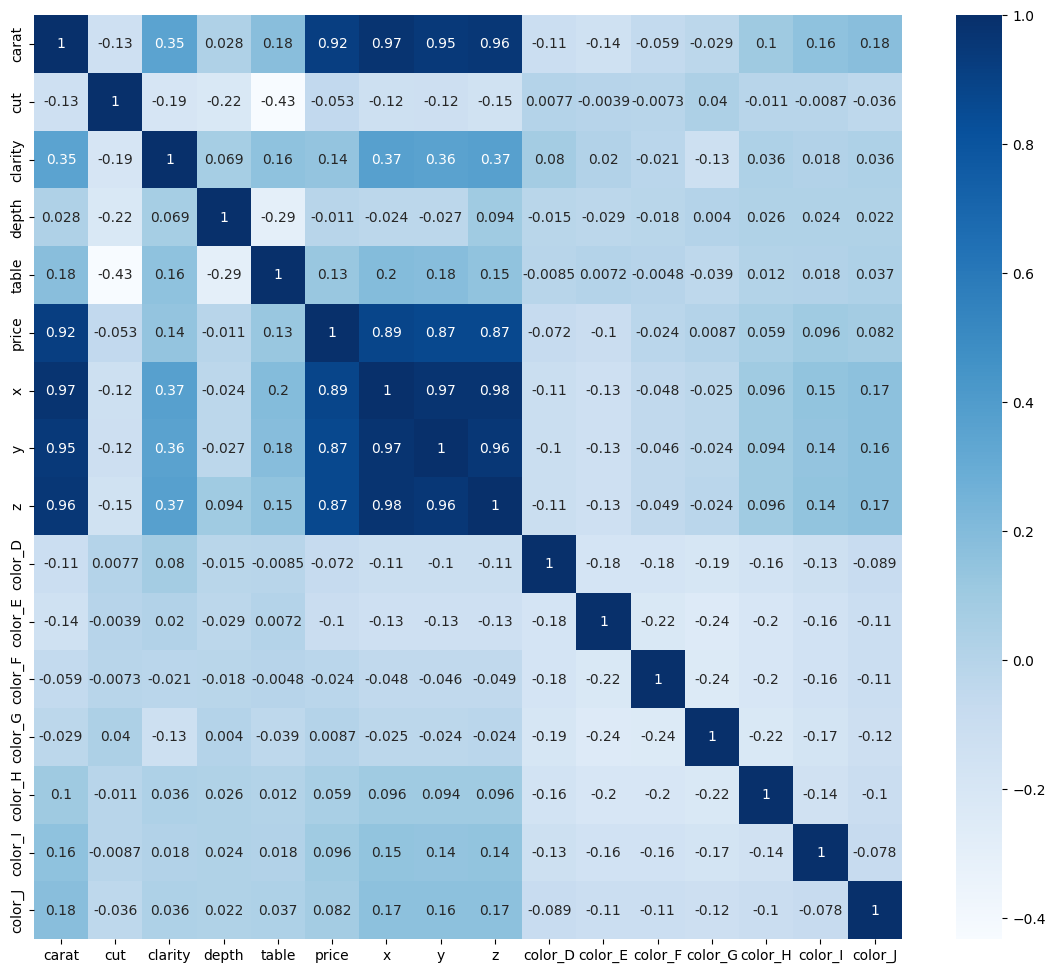

In [119]:
corr = df.corr() # матрица корреляций
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="Blues", annot=True)

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

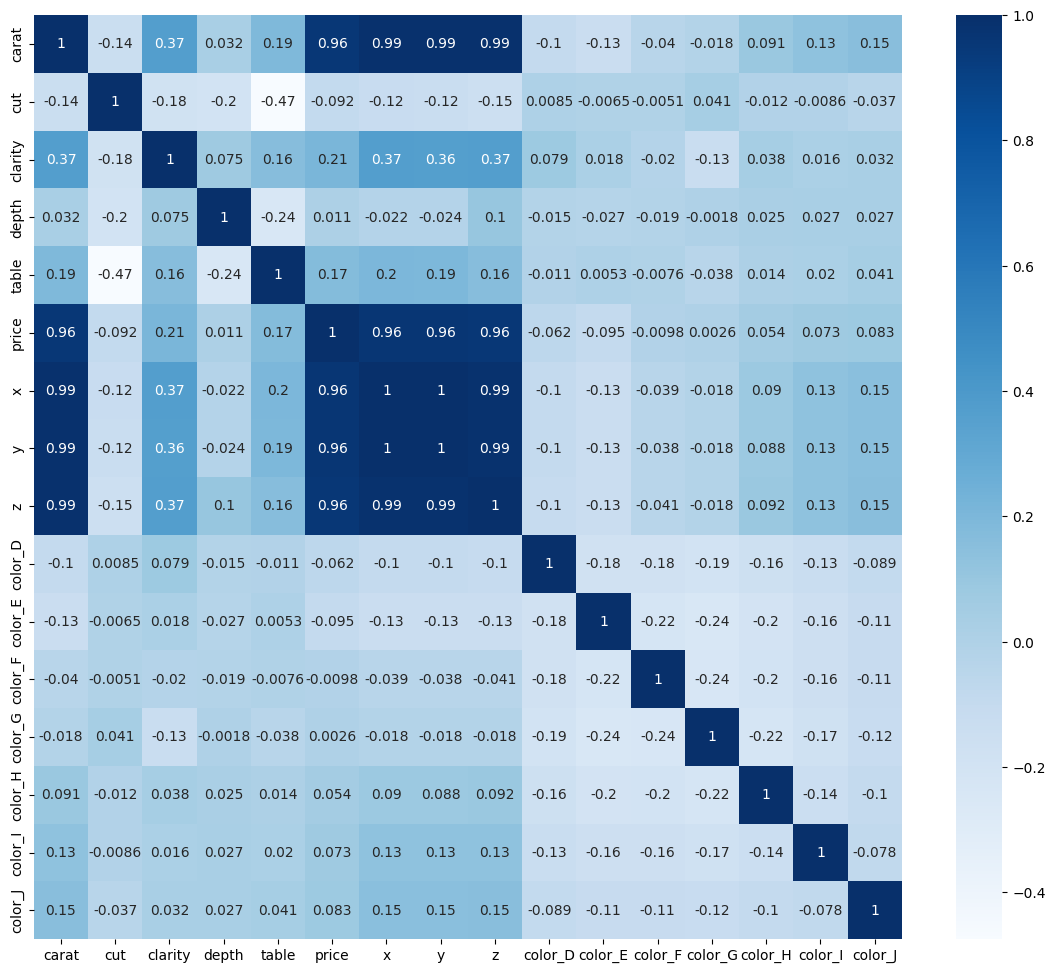

In [120]:
corr = df.corr(method='spearman')
plt.figure(figsize=(14, 12))

sns.heatmap(corr, cmap="Blues", annot=True);

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

### Задание 1

Вычислите матрицу корреляций, используя корреляцию Кендалла.

С каким столбцом коррелирует в этой матрице `depth` больше всего?

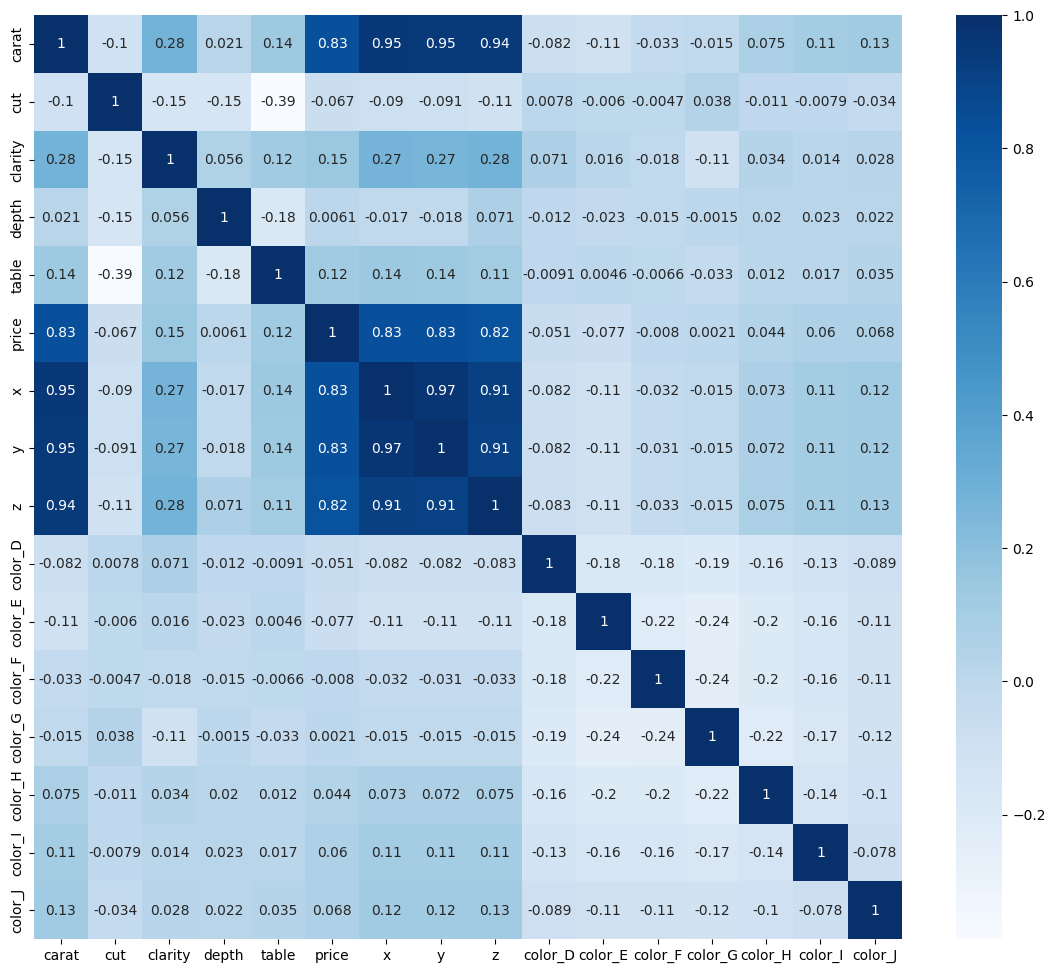

In [121]:
corr = df.corr(method='kendall')
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="Blues", annot=True);

In [122]:
depth_corr = corr['depth'].drop('depth')  # исключаем сам себя
most_correlated_column = depth_corr.idxmax()
max_corr_value = depth_corr.max()
most_correlated_column

'z'

In [123]:
max_corr_value

0.07071477903838709

### 2. V-мера Крамера

*Для измерения связи между Категориальным - Категориальным признаком*

Для оценки степени взаимосвязи категориальных столбцов можно вычислять V-меру Крамера.
Это вариант нормировки статистики $\chi^2$. Статистика $\chi^2$ - это функция, измеряющая меру взаимосвязи двух категориальных переменных.

Пусть $X, Y$ - две категориальных переменных, тогда $\chi^2$ вычисляется по формуле

$$\chi^2(X,Y)=\sum_{i,j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}},$$

где $O_{ij}$ - наблюдаемая частота события, $E_{ij}$ - ожидаемая частота события (в предположении, что величины $X$ и $Y$ независимы).

Чем больше значение $\chi^2$ - тем больше степень взаимосвязи переменных $X$ и $Y$.



**Покажем на примере.**

Изучим по некоторым данным зависимость факта курения и повышенного давления. По данным составим таблицу сопряженности.

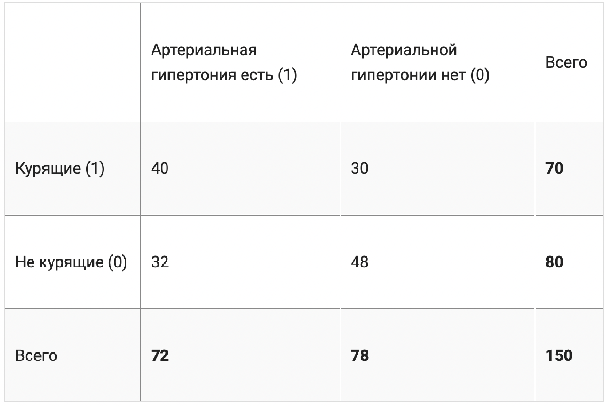

Вычисляем $\chi^2$:

$O_{11} = 40$

$E_{11} = 70 * 72 / 150 \approx 33.6 $ (так считается $E_{ij}$, если величины независимы)

Аналогично вычисляются оставшиеся слагаемые в формуле. Получаем

$\chi^2(X,Y) = (40-33.6)^2/33.6 + (30-36.4)^2/36.4 + (32-38.4)^2/38.4 + (48-41.6)^2/41.6 = 4.396$



Чем больше $\chi^2$, тем больше взаимосвязь между признаками.

В случае, если признаки независимы, то ожидаемая и наблюдаемая частоты совпадут, и $\chi^2=0$.



V-мера Крамера - это нормировка $\chi^2$ на число значений в каждой категории:

$$V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}},$$

где


$n$ - общее число наблюдений

$k$ - число категорий в $X$

$r$ - число категорий в $Y$


В результате этой нормировки V-мера находится на отрезке от 0 до 1 и легко интерпретируется: *чем больше V-мера - тем больше зависимость между двумя переменными, и наоборот.*

In [124]:
df_cat.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53786.000000,53786,53786,53786,53786.000000,53786.000000,53786.000000,53786.000000,53786.000000,53786.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21462,11256,13033,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.796342,NaN,NaN,NaN,61.749433,57.457786,3931.718588,5.731689,5.734953,3.540050
std,0.470776,NaN,NaN,NaN,1.415463,2.233190,3986.732404,1.118828,1.139589,0.702185
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000


In [125]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53786 entries, 0 to 53804
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53786 non-null  float64
 1   cut      53786 non-null  object 
 2   color    53786 non-null  object 
 3   clarity  53786 non-null  object 
 4   depth    53786 non-null  float64
 5   table    53786 non-null  float64
 6   price    53786 non-null  float64
 7   x        53786 non-null  float64
 8   y        53786 non-null  float64
 9   z        53786 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.5+ MB


In [126]:
!pip install association-metrics -q

In [127]:
import association_metrics as am

df_cat = df_cat.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

/usr/local/lib/python3.12/dist-packages/association_metrics/categorical.py:100: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.matrix[x][y] = 1
/usr/local/lib/python3.12/dist-packages/association_metrics/categorical.py:104: FutureWarning

,cut,color,clarity
cut,1.000000,0.037698,0.142325
color,0.037698,1.000000,0.079533
clarity,0.142325,0.079533,1.000000


Наибольшая связь между CUT и CLARITY видимо бриллианты с лучшей частотой совсем немного чаще получше гранят. Но связь очень слабая

### 3. ANOVA

*Для измерения связи между Числовым - Категориальным признаком*

ANOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [128]:
# Generating sample data
import pandas as pd
ColumnNames=['FuelType','CarPrice']
DataValues= [
             [  'Petrol',   2000],
             [  'Petrol',   2100],
             [  'Petrol',   1900],
             [  'Petrol',   2150],
             [  'Petrol',   2100],
             [  'Petrol',   2200],
             [  'Petrol',   1950],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'Diesel',   2900],
             [  'Diesel',   2850],
             [  'Diesel',   2600],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'CNG',   1500],
             [  'CNG',   1400],
             [  'CNG',   1600],
             [  'CNG',   1650],
             [  'CNG',   1600],
             [  'CNG',   1500],
             [  'CNG',   1500]
           ]
#Create the Data Frame
CarData=pd.DataFrame(data=DataValues,columns=ColumnNames)

########################################################
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value

from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list

CategoryGroupLists = CarData.groupby('FuelType')['CarPrice'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  4.3558466424602e-12
Features are correlated


In [129]:
print(df_cat.dtypes)

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price       float64
x           float64
y           float64
z           float64
dtype: object


In [130]:
from scipy.stats import f_oneway
import pandas as pd

Data = []
df_cat = df_cat.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

# Категориальные столбцы (тип category)
categorical_cols = df_cat.select_dtypes(include=['category']).columns
# Числовые столбцы (тип float64)
numerical_cols = df_cat.select_dtypes(include=['float64']).columns

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        CategoryGroupLists = df_cat.groupby(cat_col)[num_col].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        Data.append({
            'Category': cat_col,
            'Numerical': num_col,
            'F-statistic': round(AnovaResults[0], 4),
            'p-value': round(AnovaResults[1], 6),
            'Is correlated': 'Yes' if AnovaResults[1] < 0.05 else 'No'
        })

AnovaRes = pd.DataFrame(Data)
AnovaRes

/tmp/ipython-input-2854483273.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  CategoryGroupLists = df_cat.groupby(cat_col)[num_col].apply(list)


,Category,Numerical,F-statistic,p-value,Is correlated
0,cut,carat,480.5535,0.0,Yes
1,cut,depth,1827.7981,0.0,Yes
2,cut,table,6332.1890,0.0,Yes
3,cut,price,171.3282,0.0,Yes
4,cut,x,483.3855,0.0,Yes
5,cut,y,390.5055,0.0,Yes
6,cut,z,490.7480,0.0,Yes
7,color,carat,913.8599,0.0,Yes
8,color,depth,24.2057,0.0,Yes
9,color,table,27.4412,0.0,Yes


у всех  p-value < 0.05 Значит они статистически значимы.  То-есть значения числовых параметров различаются между разными категориями

Все категории важны

## Polars

В конце 2020 года в python стала доступна библиотека Polars.

Polars - это высокопроизводительная библиотека для манипуляции и анализа данных в Python и Rust. Она была создана как альтернатива Pandas, но с учетом возможностей параллельной обработки данных на многопроцессорных системах.

Одним из основных преимуществ Polars является его скорость работы с данными. Polars использует многопоточную обработку данных, что позволяет обрабатывать большие объемы данных на многопроцессорных системах в несколько раз быстрее, чем Pandas. Кроме того, Polars имеет более эффективную систему памяти, что позволяет работать с данными, которые не помещаются в оперативной памяти.


Хорошая [статья про сравнение Pandas и Polars](https://vc.ru/u/1389654-machine-learning/583603-pandas-vs-polars-sravnenie-sintaksisa-i-skorosti)

In [131]:
df_big = df_cat.copy()

for i in range(50):
  df_big = pd.concat([df_big, df_cat])

df_big.to_csv("diamonds_big.csv", index=False)

In [132]:
df_big.shape, df_cat.shape

((2743086, 10), (53786, 10))

In [133]:
!pip install polars

import polars as pl

print(pl.__version__)

1.31.0


### Загрузка данных

In [134]:
%%time

df_pl = pl.read_csv("diamonds_big.csv")

CPU times: user 2.67 s, sys: 130 ms, total: 2.8 s
Wall time: 2.32 s


In [135]:
%%time

df = pd.read_csv("diamonds_big.csv")

CPU times: user 3.25 s, sys: 492 ms, total: 3.75 s
Wall time: 6.33 s


### Выбор и фильтрация данных

In [136]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [137]:
%%time

df[['carat', 'depth']]

CPU times: user 11.6 ms, sys: 891 µs, total: 12.5 ms
Wall time: 18 ms


,carat,depth
0,0.23,61.5
1,0.21,59.8
2,0.23,56.9
3,0.29,62.4
4,0.31,63.3
...,...,...
2743081,0.72,60.8
2743082,0.72,63.1
2743083,0.70,62.8
2743084,0.86,61.0


In [138]:
%%time

df_pl[['carat', 'depth']]

# df_pl.select(pl.col(['carat', 'depth']))

CPU times: user 1.05 ms, sys: 3 µs, total: 1.05 ms
Wall time: 6.6 ms


carat,depth
f64,f64
0.23,61.5
0.21,59.8
0.23,56.9
0.29,62.4
0.31,63.3
…,…
0.72,60.8
0.72,63.1
0.7,62.8


In [139]:
# Pandas
%%time

df.query('carat > 5')

CPU times: user 24.6 ms, sys: 0 ns, total: 24.6 ms
Wall time: 66.3 ms


,carat,cut,color,clarity,depth,table,price,x,y,z
27341,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
81127,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
134913,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
188699,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
242485,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
296271,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
350057,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
403843,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
457629,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
511415,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98


In [140]:
# Polars
%%time

df_pl.filter(pl.col('carat') > 5)

CPU times: user 10.4 ms, sys: 20 µs, total: 10.4 ms
Wall time: 16.7 ms


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
…,…,…,…,…,…,…,…,…,…
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98


### Задание 2

С помощью polars и pandas отфильтруйте таблицу, оставив в ней только строки, удовлетворяющие условиям:
* `color` = "J"
* `price` > 1000

Сравните время выполнения запросов

In [141]:
%%time

df[(df.color == 'J') & (df.price > 1000)]

CPU times: user 401 ms, sys: 3.61 ms, total: 405 ms
Wall time: 622 ms


,carat,cut,color,clarity,depth,table,price,x,y,z
172,1.17,Very Good,J,I1,60.2,61.0,2774.0,6.83,6.90,4.13
247,1.05,Very Good,J,SI2,63.2,56.0,2789.0,6.49,6.45,4.09
255,1.05,Fair,J,SI2,65.8,59.0,2789.0,6.41,6.27,4.18
324,1.00,Premium,J,SI2,62.3,58.0,2801.0,6.45,6.34,3.98
366,0.93,Premium,J,SI2,61.9,57.0,2807.0,6.21,6.19,3.84
...,...,...,...,...,...,...,...,...,...,...
2742848,0.90,Good,J,SI2,63.9,56.0,2717.0,6.17,6.10,3.92
2742933,0.90,Good,J,SI1,63.2,60.0,2729.0,6.09,6.12,3.86
2742994,0.82,Ideal,J,VS2,61.6,56.0,2741.0,6.00,6.04,3.71
2742998,0.83,Ideal,J,VS2,62.3,55.0,2742.0,6.01,6.03,3.75


In [142]:
%%time

df_pl.filter((pl.col('color') == 'J') & (pl.col('price') > 1000))

CPU times: user 76 ms, sys: 1.92 ms, total: 77.9 ms
Wall time: 92.7 ms


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
1.17,"""Very Good""","""J""","""I1""",60.2,61.0,2774.0,6.83,6.9,4.13
1.05,"""Very Good""","""J""","""SI2""",63.2,56.0,2789.0,6.49,6.45,4.09
1.05,"""Fair""","""J""","""SI2""",65.8,59.0,2789.0,6.41,6.27,4.18
1.0,"""Premium""","""J""","""SI2""",62.3,58.0,2801.0,6.45,6.34,3.98
0.93,"""Premium""","""J""","""SI2""",61.9,57.0,2807.0,6.21,6.19,3.84
…,…,…,…,…,…,…,…,…,…
0.9,"""Good""","""J""","""SI2""",63.9,56.0,2717.0,6.17,6.1,3.92
0.9,"""Good""","""J""","""SI1""",63.2,60.0,2729.0,6.09,6.12,3.86
0.82,"""Ideal""","""J""","""VS2""",61.6,56.0,2741.0,6.0,6.04,3.71


### Агрегация данных

In [143]:
df_pl.head()

carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75


In [144]:
%%time

df.groupby('cut').agg({'table' : 'mean', 'price' : 'max'})

CPU times: user 373 ms, sys: 3.09 ms, total: 376 ms
Wall time: 480 ms


,table,price
cut,,
Fair,59.059236,18574.0
Good,58.675852,18707.0
Ideal,55.952866,18806.0
Premium,58.747878,18823.0
Very Good,57.956123,18818.0


In [145]:
%%time

df_pl.group_by('cut').agg([pl.mean('table'), pl.max('price')])

CPU times: user 252 ms, sys: 36.7 ms, total: 289 ms
Wall time: 347 ms


cut,table,price
str,f64,f64
"""Fair""",59.059236,18574.0
"""Good""",58.675852,18707.0
"""Very Good""",57.956123,18818.0
"""Premium""",58.747878,18823.0
"""Ideal""",55.952866,18806.0


In [146]:
# lazy operations
%%time

q = (
    df_pl
    .lazy()
    .group_by(by='cut')
    .agg(
        [
            pl.col('table').mean(),
            pl.col('price').max()
        ]
    )
)

CPU times: user 265 µs, sys: 0 ns, total: 265 µs
Wall time: 274 µs


In [147]:
%%time

q.collect()

CPU times: user 182 ms, sys: 98 µs, total: 182 ms
Wall time: 202 ms


by,table,price
str,f64,f64
"""Very Good""",57.956123,18818.0
"""Good""",58.675852,18707.0
"""Fair""",59.059236,18574.0
"""Premium""",58.747878,18823.0
"""Ideal""",55.952866,18806.0


### Задание 3

Для каждого цвета (`color`) вычислите медианную стоимость алмазов и средний вес (`carat`).

* Сначала напишите eager-запрос в стиле, приближенном к pandas.

* Затем напишите lazy-запрос в polars-стиле. После этого выполните запрос методом collect.

* Сравните время выполнения запросов.



In [148]:
%%time
import time

# Pandas
start = time.time()
eager_result = (
    pl.read_csv("diamonds_big.csv")
    .group_by('color')
    .agg([
        pl.col('price').median().alias('median_price'),
        pl.col('carat').mean().alias('mean_carat')
    ])
    .sort('color')
)
eager_time = time.time() - start
print(f"Eager время: {eager_time:.4f}")

eager_result

Eager время: 4.5099
CPU times: user 3.82 s, sys: 164 ms, total: 3.98 s
Wall time: 4.51 s


color,median_price,mean_carat
str,f64,f64
"""D""",1842.0,0.658617
"""E""",1741.0,0.657815
"""F""",2345.0,0.736262
"""G""",2242.0,0.769698
"""H""",3449.5,0.908474
"""I""",3721.5,1.020457
"""J""",4234.5,1.15934


In [149]:
%%time
#Polar
start = time.time()
lazy_result = (
    pl.scan_csv("diamonds_big.csv")
    .group_by('color')
    .agg([
        pl.col('price').median().alias('median_price'),
        pl.col('carat').mean().alias('mean_carat')
    ])
    .sort('color')
    .collect()
)
lazy_time = time.time() - start
print(f"Lazy время: {lazy_time:.4f}")

lazy_result

Lazy время: 1.7173
CPU times: user 1.28 s, sys: 88.2 ms, total: 1.37 s
Wall time: 1.72 s


color,median_price,mean_carat
str,f64,f64
"""D""",1842.0,0.658617
"""E""",1741.0,0.657815
"""F""",2345.0,0.736262
"""G""",2242.0,0.769698
"""H""",3449.5,0.908474
"""I""",3721.5,1.020457
"""J""",4234.5,1.15934


In [150]:
print(f"\nУскорение Lazy относительно Eager: {eager_time/lazy_time:.1f} раз")


Ускорение Lazy относительно Eager: 2.6 раз


### Polars lazy-API

[Документация](https://pola-rs.github.io/polars-book/user-guide/lazy/using/)

With the lazy API, Polars doesn't run each query line-by-line but instead processes the full query end-to-end. To get the most out of Polars it is important that you use the lazy API because:

* the lazy API allows Polars to apply automatic query optimization with the query optimizer

* the lazy API allows you to work with larger than memory datasets using streaming

* the lazy API can catch schema errors before processing the data

In [151]:
q = (
    pl.scan_csv("diamonds_big.csv")
    .with_columns(pl.col("color").str.to_lowercase())
    .filter(pl.col("price") > 1000)
)

In [152]:
q

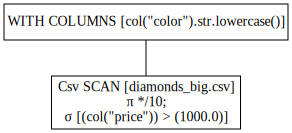

In [153]:
q.show_graph()

In [154]:
%%time

q.collect()

CPU times: user 2.54 s, sys: 171 ms, total: 2.72 s
Wall time: 4.25 s


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72
…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56


In [155]:
%%time

q.collect(streaming=True)

<timed eval>:1: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.


CPU times: user 2.5 s, sys: 417 ms, total: 2.92 s
Wall time: 3.03 s


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72
…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56


### Заключение по Polars и Pandas

Нельзя сказать, что Polars во всех запросах сильно выигрывает у Pandas, но благодаря его появлению разработчики выпустили Pandas 2.0 - версию классической библиотеки с привычным синтаксисом, но гораздо более быстрой работой.

Про сравнение Pandas, Polars и Pandas 2.0 можно почитать [здесь](https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1).

# Введение в машинное обучение (основные понятия)

Основные понятия.

В нашем примере мы можем попробовать предсказать стоимость алмаза по его характеристикам.

* алмазы - *объекты*
* характеристики - *признаки*
* стоимость - *целевая переменная*

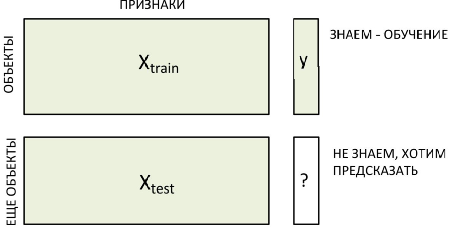

Модели машинного обучения - это некоторые математические правила (обычно функции), по которым модель делает прогноз.

**Пример (линейная регрессия):**

$price = a + b\cdot carat + c\cdot depth,$

здесь $a,b,c$ - параметры модели (заранее мы их не знаем).

*Параметры подбираются по обучающим данным так, чтобы модель ошибалась меньше всего.*

Пример плохо подобранных параметров $a, b$ модели
$$y = a + b\cdot x.$$

На рисунке
$$y = -30 + 7x.$$

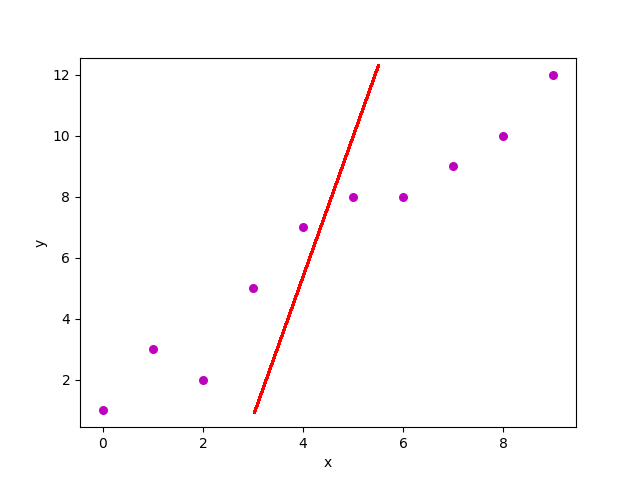

Пример хорошо подобранных параметров:
$$y = 0.5 + x.$$

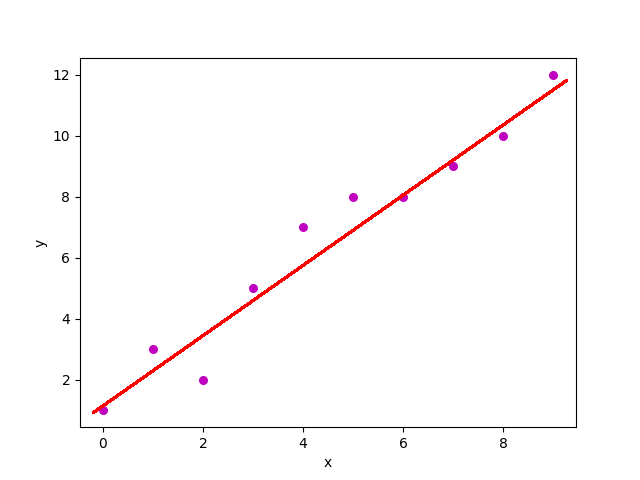

Функции для построения прогнозов бывают разные:

* линейные модели
* решающие правила (если $a$, то $b$)
* нейронные сети
* другие модели

Каждая модель хорошо работает в своих предположениях о данных, поэтому изучить распределение целевой переменной всегда очень полезно.

Обучим линейную регрессию предсказывать цену по числу карат.

In [156]:
X = df[['carat']] # матрица объект-признак
y = df['price'] # целевая переменная

In [157]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

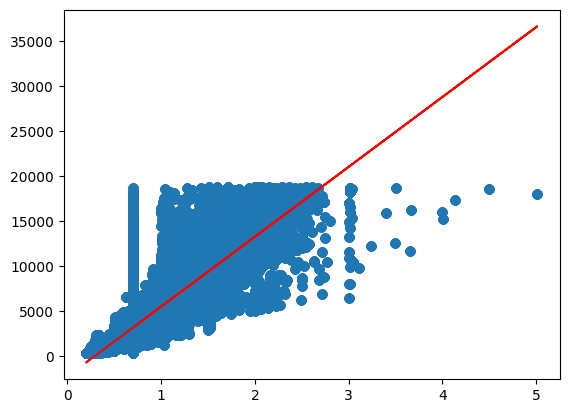

In [158]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

Вычислим ошибку модели

$$MAE = \frac1l\sum_{i=1}^l |a(x_i)-y_i|$$

In [159]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, pred)

In [160]:
m_y= np.mean(y)

In [167]:
(mae / m_y) * 100

np.float64(26.07250549873402)

Довольно высокая ошибка 26 процентов

## Анализ распределения столбцов (целевой переменной)

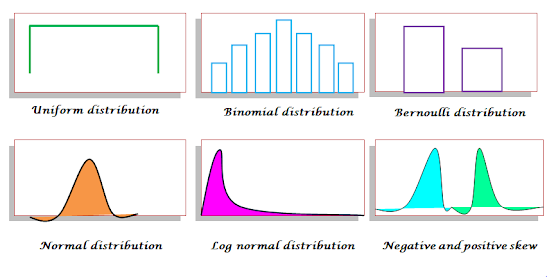

В основном в задачах регрессии мы ожидаем увидеть нормально распределенную целевую переменную. Многие модели заточены под нормальное распределение.

Но не только в этом дело...

<Axes: xlabel='price', ylabel='Count'>

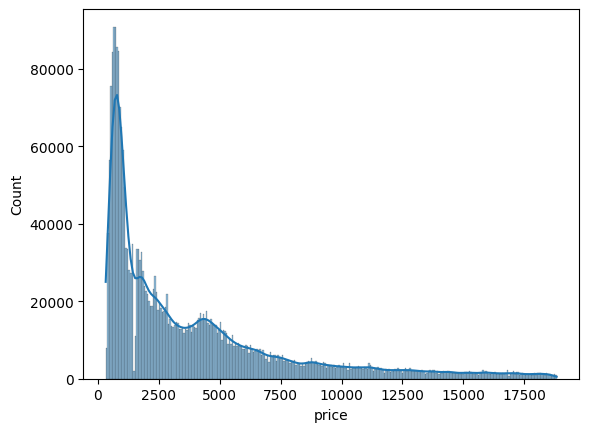

In [163]:
sns.histplot(data = df['price'], kde = True)

<Axes: xlabel='price', ylabel='Count'>

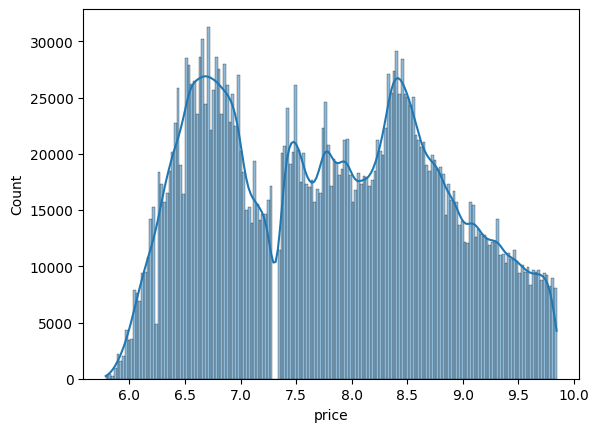

In [164]:
sns.histplot(data = np.log(df['price']), kde = True)

Мы видим у распределения тяжелый хвост, который может быть трудно прогнозируем моделями (так как там мало значений).

Проверим это.

In [165]:
mae_before_10000 = mean_absolute_error(y[y < 10000], pred[y < 10000])
mae_before_10000

812.5919391163766

In [166]:
mae_after_10000 = mean_absolute_error(y[y >= 10000], pred[y >= 10000])
mae_after_10000

3010.6355021043055

Действительно, ошибка на дорогих алмазах больше.

In [168]:
X2 = df[['carat']]
y2 = df['depth']

lr = LinearRegression()
lr.fit(X2, y2)

LinearRegression()

In [169]:
pred_depth = lr.predict(X2)

mean_absolute_error(y2, pred_depth), np.mean(y2)

(1.0074215822488015, np.float64(61.749432937939254))

<Axes: xlabel='depth', ylabel='Count'>

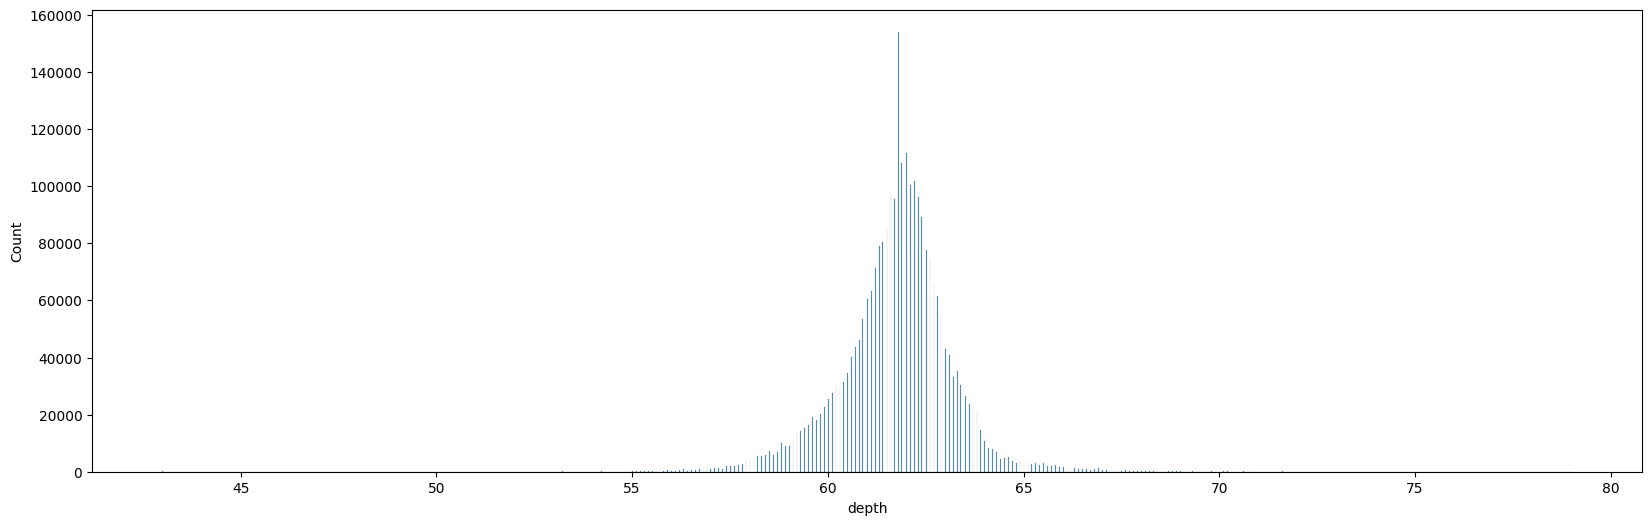

In [170]:
plt.figure(figsize=(20, 6))
sns.histplot(df.depth)

In [171]:
len(y2[y2<60])/len(y2) # доля выборки

0.09279366377867847

In [172]:
mean_absolute_error(y2[y2<60], pred_depth[y2<60])

2.7812013965752276

In [173]:
len(y2[(y2 >= 60) & (y2 <= 63)])/len(y2) # доля выборки

0.7786412821180233

In [174]:
mean_absolute_error(y2[(y2 >= 60) & (y2 <= 63)], pred_depth[(y2 >= 60) & (y2 <= 63)])

0.601712121771694

## Задание 4

Будем решать задачу прогноза стоимости алмаза по его параметру `table`.

Обучите линейную регрессию для решения этой задачи и выведите на экран ошибку MAE.

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = df[['table']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)
mae = mean_absolute_error(y, pred)
mae

2987.4951264963997

## Задание 5

Сколько процентов от среднего значения `price` составляет ошибка?

In [176]:
mean_price = np.mean(y)
percentage_error = (mae / mean_price) * 100
percentage_error

np.float64(75.98445970292994)

## Задание 6

Вычислите ошибку MAE для алмазов маленькой и большой стоимости отдельно:

* `price` < 10_000
* `price` >= 10_000

Какая из ошибок больше?

Как вы думаете почему?

In [177]:
mae_before_10000 = mean_absolute_error(y[y < 10000], pred[y < 10000])
mae_before_10000

2279.0981133016653

In [178]:
mae_after_10000 = mean_absolute_error(y[y >= 10000], pred[y >= 10000])
mae_after_10000

9606.375373242456